In [52]:
from numbers import Number
# this is the class that we will use to create sub classes for objects that will be used to make this model
class Pokemon:
    def __init__(self, *attributes: float) -> None:
        self._set_attributes(attributes)

    @property
    # properties
    def attributes(self) -> tuple:
        return self._attributes #getter

    @attributes.setter
    #setter for attributes typed tuple
    def attributes(self, new_attributes: tuple) -> None:
        self._set_attributes(new_attributes)
    # some cases handeling and setter of attributes
    def _set_attributes(self, attributes: tuple) -> None:
        for attr in attributes:
            if not isinstance(attr, Number):
                raise TypeError(f"{attr} is not a valid number for a Pokemon attribute")

        if len(attributes) <= 0:
            raise ValueError("Attributes list can't be empty")

        self._attributes = attributes

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}{repr(self._attributes)}"
# the sub classes here and the sub functions i guess if thats what they are called
class Pichu(Pokemon):
    def __init__(self, Height: float, Width: float, Label: float) -> None:
        super().__init__(Height, Width, Label)

class Pikachu(Pokemon):
    def __init__(self, Height: float, Width: float, Label: float) -> None:
        super().__init__(Height, Width, Label)

class TestPoints(Pokemon):
    def __init__(self, Height: float, Width: float, Label: float) -> None:
        super().__init__(Height, Width, Label)

class Distances(Pokemon):
    def __init__(self, Distance: float, Label: float) -> None:
        super().__init__(Distance, Label)


# Instance Sub-Classes for Pichu/Pikachu/Test Points/ Distances

In [53]:
from typing import Type

text_path1 = "pichu.txt"
text_path2 = "pikachu.txt"
text_path3 = "test_points.txt"
# the reading data function simple and beautiful

def read_data_from_file(file_path: str, object_type: Type, label) -> list:
    with open(file_path, "r") as file:
        raw_text = file.read()

    data = []
    digit = ""
    for char in raw_text:
        if char in "0123456789.":
            digit += char
        elif digit:
            data.append(float(digit))
            digit = ""

    objects = []
    for i in range(0, len(data), 2):
        obj = object_type(float(data[i]), float(data[i + 1]), label)
        objects.append(obj)

    return objects

# reading data
pichu_list = read_data_from_file(text_path1, Pichu, 0)
pikachu_list = read_data_from_file(text_path2, Pikachu, 1)

# Read test points from file
file_test_points = read_data_from_file(text_path3, TestPoints, -1)

# input more test points besides the old ones and removed the append in file as you said
is_done = True
user_test_points = []  
while is_done:
    try: 
        Height_input = input("Enter the height for a test point: ")
        Height = float(Height_input)
        if Height < 10:
            print("Height must be larger than 10")
            continue
        Width_input = input("Enter the width for a test point: ")
        Width = float(Width_input)
        if Width < 10:
            print("Width must be larger than 10")
            continue
        test_point_object = TestPoints(float(Height), float(Width), -1)
        user_test_points.append(test_point_object)
        switch = input("Are you done with inserting? Press YES or NO: ")
        if switch.upper() == "YES":
            is_done = False
    except ValueError:
        print("Invalid input. Please enter valid float values.")

# combine all test points into one test point list for usage
test_points = file_test_points + user_test_points

# just see whats going on
print("Data from pichu.txt:", pichu_list)
print("Data from pikachu.txt:", pikachu_list)
print("Combined Test Points:", test_points)


Data from pichu.txt: [Pichu(20.11541438766307, 28.701809671168824, 0), Pichu(15.200086041781336, 27.095070307714877, 0), Pichu(17.200234546952956, 27.669778220491132, 0), Pichu(16.785685905190583, 34.36654587712494, 0), Pichu(20.8917697133121, 31.480353852465935, 0), Pichu(20.41359589938329, 31.091310056669883, 0), Pichu(22.137436541638763, 26.71138648198097, 0), Pichu(15.695510661035328, 32.291267979503495, 0), Pichu(18.375374557482164, 26.634024937619284, 0), Pichu(15.238377755504562, 28.794554417576478, 0), Pichu(16.749103798428827, 34.895233506365955, 0), Pichu(19.042842304826898, 31.399997598540928, 0), Pichu(15.212287757470909, 30.569497437746463, 0), Pichu(16.59070120549319, 31.846142509898748, 0), Pichu(20.199075502236184, 33.4285192018981, 0), Pichu(19.35953184482573, 32.75999911546245, 0), Pichu(16.763524976325574, 27.290480719641042, 0), Pichu(19.71412547100727, 25.321002439040377, 0), Pichu(21.475443653422612, 28.154530480590818, 0), Pichu(15.051990077424488, 27.67740875975

# Reading Data

# Plotting

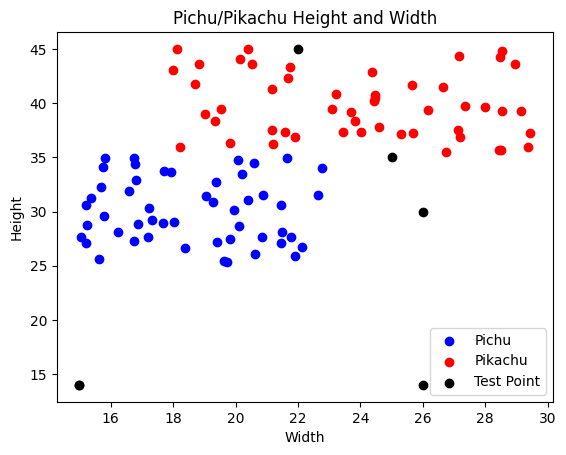

In [54]:
import matplotlib.pyplot as plt
# simple plotting nothing special
x_pichu = []
y_pichu = []
x_pikachu = []
y_pikachu = []
x_testpoint = []
y_testpoint = []
#taking points from their respective lists 
for pichu_instance in pichu_list:
    x_pichu.append(pichu_instance.attributes[0])
    y_pichu.append(pichu_instance.attributes[1])

for pikachu_instance in pikachu_list:
    x_pikachu.append(pikachu_instance.attributes[0])
    y_pikachu.append(pikachu_instance.attributes[1])

for testpoint_instance in test_points:
    x_testpoint.append(testpoint_instance.attributes[0])
    y_testpoint.append(testpoint_instance.attributes[1])
#plotting them accordingly here
plt.scatter(x_pichu , y_pichu , color = "blue" , marker= "o" , label = "Pichu")
plt.scatter(x_pikachu , y_pikachu , color = "red" , marker="o" , label = "Pikachu")
plt.scatter(x_testpoint , y_testpoint , color = "black" , marker="o" , label = "Test Point")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Pichu/Pikachu Height and Width')
plt.legend()
plt.show()    

# Euclidean Distance / My Model

In [55]:
import numpy as np
# so this solution is straight to the point (pun intended) it takes a point and loops around the pichus and pikachus and sees distances and those distances are stored in a object and is labeled
def classify_test_point(test_point, all_points, k=4):
    Distances_list = []
    pikachu_label = 1
    pichu_label = 0
    # i know the remarque about the predifined values but they are a good way for me to keep things readable for people that are seeing my code for the first time
    # also helps me debug and see what i'm doing
    for point in all_points:
        if isinstance(point, Pichu):
            d = np.sqrt((test_point.attributes[0] - point.attributes[0])**2 + (test_point.attributes[1] - point.attributes[1])**2)
            TestedPoint = Distances(float(d), float(pichu_label))
            Distances_list.append(TestedPoint)
        else:
            d = np.sqrt((test_point.attributes[0] - point.attributes[0])**2 + (test_point.attributes[1] - point.attributes[1])**2)
            TestedPoint = Distances(float(d), float(pikachu_label))
            Distances_list.append(TestedPoint)
    #bubble sorting as a classic way for the list of distance objects(don't know if i should have made it named distances)
    n = len(Distances_list)
    for i in range(n):
        for j in range(0, n-i-1):
            if Distances_list[j].attributes[0] > Distances_list[j+1].attributes[0]:
                Distances_list[j], Distances_list[j + 1] = Distances_list[j+1], Distances_list[j]
    # the counting of the points that are close
    pichu_count = 0
    pikachu_count = 0
    for z in range(k):
        if Distances_list[z].attributes[1] == 0:
            pichu_count += 1
        else:
            pikachu_count += 1
# this one sort of use the attributes this way because it needs to set the label , it was wierd but i guess it should be this way
    if pikachu_count > pichu_count:
        new_test_point = TestPoints(*test_point.attributes[:-1], 1)
        pikachu_list.append(new_test_point)
        return "Pikachu"
    else:
        new_test_point = TestPoints(*test_point.attributes[:-1], 0)
        pichu_list.append(new_test_point)
        return "Pichu"
# where the function takes its stuff from to work the model
all_points = pichu_list + pikachu_list
for test_point in test_points:
    classification = classify_test_point(test_point, all_points)
    print(f"{test_point} is classified as {classification}")


TestPoints(25.0, 35.0, -1) is classified as Pikachu
TestPoints(15.0, 14.0, -1) is classified as Pichu
TestPoints(26.0, 30.0, -1) is classified as Pichu
TestPoints(22.0, 45.0, -1) is classified as Pikachu
TestPoints(26.0, 14.0, -1) is classified as Pichu
TestPoints(15.0, 14.0, -1) is classified as Pichu


# Bonus Task (My theoretical solution)

In [63]:
import numpy as np
# i'm using more numpy in this code since my solution was already established in the previous code but this code showcases numpy slicing
#i used my previous code again only used numpy here for slicing and some stuff for the bonus task
def classify_test_point(test_point, all_points, k=4):
    Distances_list = []

    for point in all_points:
        d = np.sqrt(np.sum((test_point - point) ** 2))
        label = point[-1]

        TestedPoint = (float(d), float(label))
        Distances_list.append(TestedPoint)

    Distances_list.sort(key=lambda x: x[0])

    pichu_count = np.sum([1 for _, label in Distances_list[:k] if label == 0])
    pikachu_count = np.sum([1 for _, label in Distances_list[:k] if label == 1])

    if pikachu_count > pichu_count:
        return "Pikachu"
    else:
        return "Pichu"
#takes all points from both lists, by the way this trick taught by chat gpt allows for numpy manipulation of an array that has objects(it was tough for me to find a way to use it without it)
all_points = np.array([obj.attributes for obj in pichu_list + pikachu_list])
training_data = all_points[:90]
test_data = all_points[90:]
#total predictions for accuracy
correct_predictions = 0
total_predictions = len(test_data)

for test_point in test_data:
    #uses the model here
    classification = classify_test_point(test_point, training_data)
    #just sets in case of test points to -1
    actual_label = test_point[-1]
# sees if the prediction is correct or not
    if classification == "Pikachu" and actual_label == 1:
        correct_predictions += 1
    elif classification == "Pichu" and actual_label == 0:
        correct_predictions += 1

# calculate accuracy which is 100% in my case i hope its correct tho i don't know what i'm supposed to get
accuracy = correct_predictions / total_predictions
print(f"Model Accuracy: {accuracy * 100}%")


Model Accuracy: 100.0%
